# Retail Sales Analysis Jupyter Notebook

In [1]:
#All Models in this program test the validity of the model at predicting actiual values.  
# I have not yet added prediction/forecasting functionality.  I will do one week's work of prediction at a time.  


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import operator
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

/usr/local/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
def mape_vectorized_v2(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean() 

In [3]:
#Creating the initial Data Frame from the potLog6 csv.  Data from 1/1/2020 to 3/31/2020

df = pd.read_csv('csv/PotLog.csv')


#creating the dictionary to hold the Errors of each method.  Will find minimum(best) value at the end
rmseDictionary = {}

mapeDictionary = {}

In [4]:
#Rearanging data into two new data frames aggregated by the sums of days
#historic data contains the months of jan and february
#test data is the month of march

allData = df.copy()
allData['Timestamp'] = pd.to_datetime(allData.date,format='%Y-%m-%d')
allData.index = allData.Timestamp
allData = allData.resample('D').sum()
allData = allData.drop(columns=['hour', 'week'])

historic = df[:720].copy()

historic['Timestamp'] = pd.to_datetime(historic.date,format='%Y-%m-%d')
historic.index = historic.Timestamp
historic = historic.resample('D').sum()
historic = historic.drop(columns=['hour', 'week'])

test = df[720:].copy()

test['Timestamp'] = pd.to_datetime(test.date,format='%Y-%m-%d')
test.index = test.Timestamp
test = test.resample('D').sum()
test = test.drop(columns=['hour', 'week'])




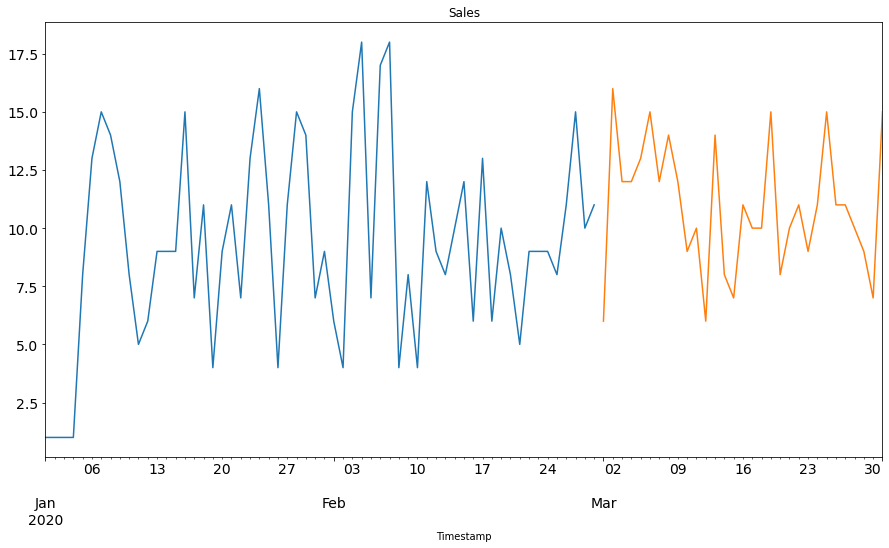

In [5]:
#Plotting the Historic and Test data on the same plane

historic.sales.plot(figsize=(15,8), title= 'Sales', fontsize=14)
test.sales.plot(figsize=(15,8), title= 'Sales', fontsize=14)

plt.show()

In [6]:
dd= np.asarray(allData.sales)
y_hat_avg = allData.copy()
y_hat_avg['naive'] = 0 
#print (y_hat_avg['sales'][3])
#print (len(y_hat_avg))

y_hat_avg['naive'][0] = allData.sales[0]
i = 1
for index, row in y_hat_avg.iterrows():
    if i < len(y_hat_avg):
        y_hat_avg['naive'][i] = allData.sales[i-1]
        #print(index)
        #sale = row.sales
        #print(sale)
        i +=1
    else:
        break


y_hat_avg.head(10)

,sales,naive
Timestamp,,
2020-01-01,1,1
2020-01-02,1,1
2020-01-03,1,1
2020-01-04,1,1
2020-01-05,8,1
2020-01-06,13,8
2020-01-07,15,13
2020-01-08,14,15
2020-01-09,12,14


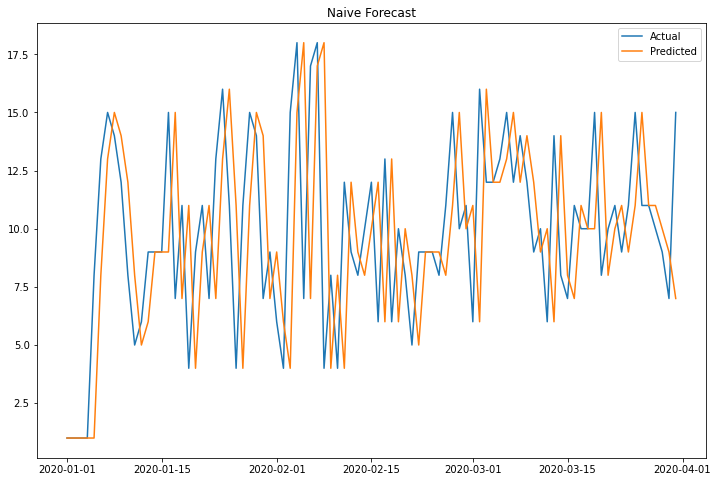

The RMS for the Naive Method is equal to 4.650416500311948


,sales,naive
Timestamp,,
2020-01-01,1,1
2020-01-02,1,1
2020-01-03,1,1
2020-01-04,1,1
2020-01-05,8,1
2020-01-06,13,8
2020-01-07,15,13
2020-01-08,14,15
2020-01-09,12,14


In [7]:
# The easy or naive forcasting method.  It predicts values according to the value of the previous day 
#This needs to be redone.  It shuold not be a straight line but rather a scatter plot

#dd= np.asarray(allData.sales)
#y_hat_avg = test.copy()
#y_hat_avg['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
#plt.plot(historic.index, historic['sales'], label='Historic Sales')
plt.plot(allData.index,allData['sales'], label='Actual')
plt.plot(y_hat_avg.index,y_hat_avg['naive'], label='Predicted')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()
    
rmse = sqrt(mean_squared_error(allData.sales, y_hat_avg.naive))
rmseDictionary["Naive"] = rmse
print("The RMS for the Naive Method is equal to {}".format(rmse))

mape = mape_vectorized_v2(allData.sales, y_hat_avg.naive)
mapeDictionary['Naive'] = mape 

y_hat_avg.head(10)

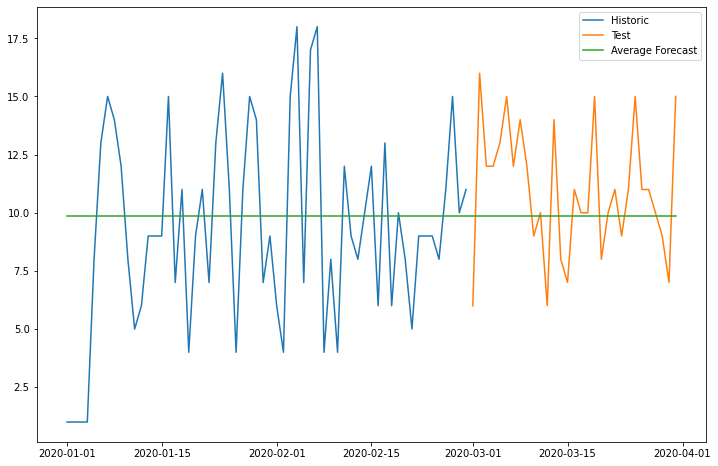

The RMS for the Simple Average Method is equal to 3.864665029828413



,sales,naive,avg_forecast
Timestamp,,,
2020-03-27,11,11,9.857143
2020-03-28,10,11,9.857143
2020-03-29,9,10,9.857143
2020-03-30,7,9,9.857143
2020-03-31,15,7,9.857143


In [8]:
#The Simple Average forcasting method forcasts according the overall average of sales

#y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = allData['sales'].mean()


plt.figure(figsize=(12,8))
plt.plot(historic['sales'], label='Historic')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

rmse = sqrt(mean_squared_error(allData.sales, y_hat_avg.avg_forecast))
rmseDictionary["Simple Average"] = rmse

print("The RMS for the Simple Average Method is equal to {}\n".format(rmse))

mape = mape_vectorized_v2(allData.sales, y_hat_avg.avg_forecast)
mapeDictionary['Simple_Average'] = mape 

y_hat_avg.tail()

/var/folders/kw/lt24g6yd1ml1zznc5n22lbb00000gn/T/ipykernel_50743/1537666344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_avg['moving_avg_forecast'][0] = allData['sales'][0].copy()
/var/folders/kw/lt24g6yd1ml1zznc5n22lbb00000gn/T/ipykernel_50743/1537666344.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_avg['moving_avg_forecast'][1] = allData['sales'][1].copy()
/var/folders/kw/lt24g6yd1ml1zznc5n22lbb00000gn/T/ipykernel_50743/1537666344.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

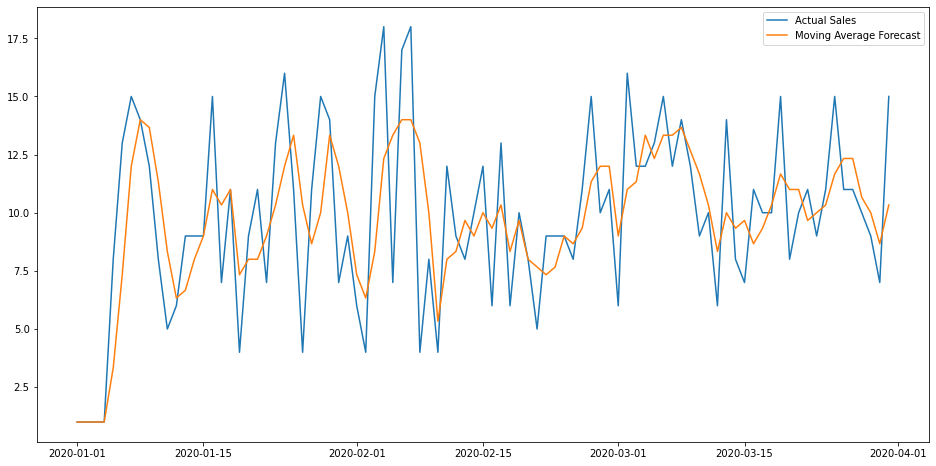

The RMSE for the Moving Average Method is equal to 2.850786580399194



,sales,naive,avg_forecast,moving_avg_forecast
Timestamp,,,,
2020-01-01,1,1,9.857143,1.000000
2020-01-02,1,1,9.857143,1.000000
2020-01-03,1,1,9.857143,1.000000
2020-01-04,1,1,9.857143,1.000000
2020-01-05,8,1,9.857143,3.333333


In [9]:
#The moving average forcasting method forcasts according the average of a number of units.  In this case we use 7 days 
#or one week.  More testing should be done to discover the best number of days to use for average
#This should also shift by values.  Will revisit this 

#y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = allData['sales'].rolling(3).mean()
y_hat_avg['moving_avg_forecast'][0] = allData['sales'][0].copy()
y_hat_avg['moving_avg_forecast'][1] = allData['sales'][1].copy()
y_hat_avg['moving_avg_forecast'][2] = allData['sales'][2].copy()

plt.figure(figsize=(16,8))
#plt.plot(historic['sales'], label='Historic')
#plt.plot(test['sales'], label='Test')
plt.plot(allData['sales'], label='Actual Sales')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()
    
rmse = sqrt(mean_squared_error(allData.sales, y_hat_avg.moving_avg_forecast))
rmseDictionary["Moving Average"] = rmse
print("The RMSE for the Moving Average Method is equal to {}\n".format(rmse))

mape = mape_vectorized_v2(allData.sales, y_hat_avg.moving_avg_forecast)
mapeDictionary['Moving Average'] = mape 

y_hat_avg.head()

In [10]:
model = SimpleExpSmoothing(np.asarray(allData['sales']))
fit1 = model.fit()
fit2 = model.fit(smoothing_level=0.2)
fit3 = model.fit(smoothing_level=0.5)
fit4 = model.fit(optimized=True)


y_hat_avg['Simple_Exponential_Smoothing_alpha=.3'] = fit1.fittedvalues
y_hat_avg['Simple_Exponential_Smoothing_alpha=.2'] = fit2.fittedvalues
y_hat_avg['Simple_Exponential_Smoothing_alpha=.5'] = fit3.fittedvalues
y_hat_avg['Simple_Exponential_Smoothing_alpha_Optimum'] = fit4.fittedvalues

y_hat_avg.head()
#print(fit1.fittedvalues)

,sales,naive,avg_forecast,moving_avg_forecast,Simple_Exponential_Smoothing_alpha=.3,Simple_Exponential_Smoothing_alpha=.2,Simple_Exponential_Smoothing_alpha=.5,Simple_Exponential_Smoothing_alpha_Optimum
Timestamp,,,,,,,,
2020-01-01,1,1,9.857143,1.000000,9.857143,4.959090,1.599929,9.857143
2020-01-02,1,1,9.857143,1.000000,9.857143,4.167272,1.299964,9.857143
2020-01-03,1,1,9.857143,1.000000,9.857143,3.533817,1.149982,9.857143
2020-01-04,1,1,9.857143,1.000000,9.857143,3.027054,1.074991,9.857143
2020-01-05,8,1,9.857143,3.333333,9.857142,2.621643,1.037496,9.857142


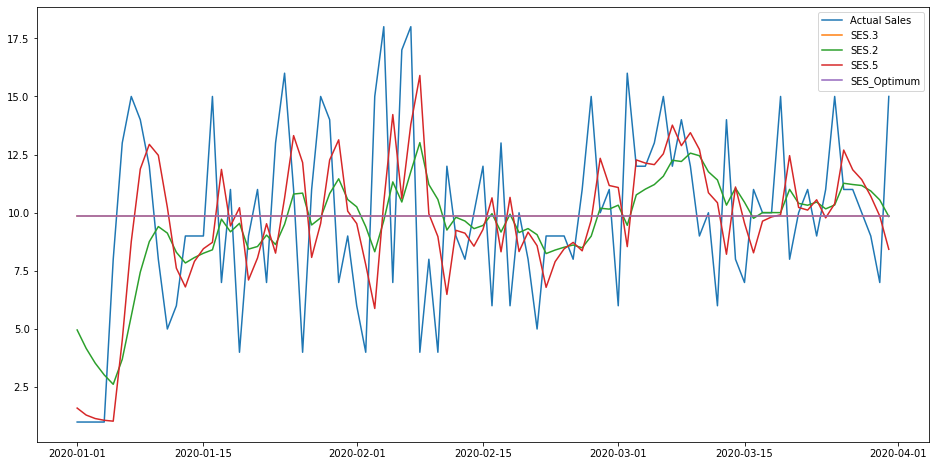

In [11]:
#The Exponential Smoothing Forcasting  I know that i've implemented it correctly, but i do not understand how it works 
# in python.  Need to study 

#y_hat_avg = test.copy()
#y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(allData['sales'], label='Actual Sales')
#plt.plot(test['sales'], label='Test')
plt.plot(y_hat_avg['Simple_Exponential_Smoothing_alpha=.3'], label='SES.3')
plt.plot(y_hat_avg['Simple_Exponential_Smoothing_alpha=.2'], label='SES.2')
plt.plot(y_hat_avg['Simple_Exponential_Smoothing_alpha=.5'], label='SES.5')
plt.plot(y_hat_avg['Simple_Exponential_Smoothing_alpha_Optimum'], label='SES_Optimum')

plt.legend(loc='best')
plt.show()
    
rmse = sqrt(mean_squared_error(allData.sales, y_hat_avg['Simple_Exponential_Smoothing_alpha=.3']))
rmseDictionary["Exponential_Smoothing.3"] = rmse

rmse = sqrt(mean_squared_error(allData.sales, y_hat_avg['Simple_Exponential_Smoothing_alpha=.2']))
rmseDictionary["Exponential_Smoothing.2"] = rmse

rmse = sqrt(mean_squared_error(allData.sales, y_hat_avg['Simple_Exponential_Smoothing_alpha=.5']))
rmseDictionary["Exponential_Smoothing.5"] = rmse

rmse = sqrt(mean_squared_error(allData.sales, y_hat_avg['Simple_Exponential_Smoothing_alpha_Optimum']))
rmseDictionary["Exponential_Smoothing_Optimum"] = rmse


mape = mape_vectorized_v2(allData.sales, y_hat_avg['Simple_Exponential_Smoothing_alpha=.3'])
mapeDictionary['Simple_Exponential_Smoothing.3'] = mape 

mape = mape_vectorized_v2(allData.sales, y_hat_avg['Simple_Exponential_Smoothing_alpha=.2'])
mapeDictionary['Simple_Exponential_Smoothing.2'] = mape 

mape = mape_vectorized_v2(allData.sales, y_hat_avg['Simple_Exponential_Smoothing_alpha=.5'])
mapeDictionary['Simple_Exponential_Smoothing.5'] = mape 

mape = mape_vectorized_v2(allData.sales, y_hat_avg['Simple_Exponential_Smoothing_alpha_Optimum'])
mapeDictionary['Simple_Exponential_Smoothing_Optimum'] = mape 


#y_hat_avg.head()

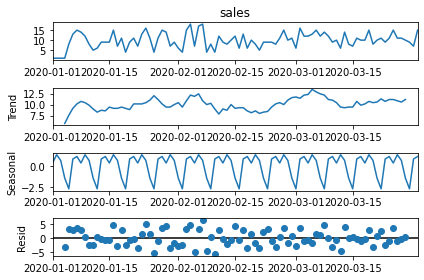

In [12]:
#Tests Data for trends, seasonality, etc to preprocess for Holt Winter

sm.tsa.seasonal_decompose(allData.sales).plot()
result = sm.tsa.stattools.adfuller(allData.sales)
plt.show()

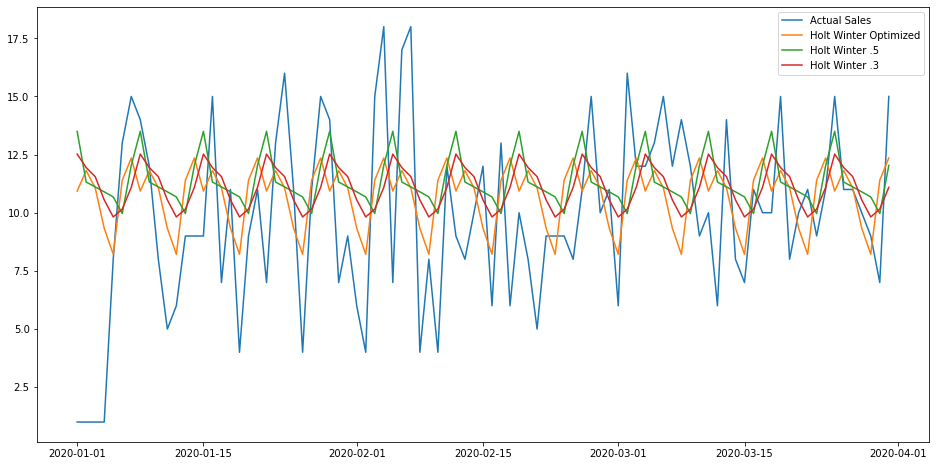

,sales,naive,avg_forecast,moving_avg_forecast,Simple_Exponential_Smoothing_alpha=.3,Simple_Exponential_Smoothing_alpha=.2,Simple_Exponential_Smoothing_alpha=.5,Simple_Exponential_Smoothing_alpha_Optimum,Holt_Winter_Optimum,Holt_Winter_.5,Holt_Winter_.3
Timestamp,,,,,,,,,,,
2020-01-01,1,1,9.857143,1.000000,9.857143,4.959090,1.599929,9.857143,10.932666,13.501084,12.522079
2020-01-02,1,1,9.857143,1.000000,9.857143,4.167272,1.299964,9.857143,11.810095,11.318897,11.941726
2020-01-03,1,1,9.857143,1.000000,9.857143,3.533817,1.149982,9.857143,11.073389,11.110567,11.554229
2020-01-04,1,1,9.857143,1.000000,9.857143,3.027054,1.074991,9.857143,9.335734,10.898330,10.552254
2020-01-05,8,1,9.857143,3.333333,9.857142,2.621643,1.037496,9.857142,8.212906,10.680159,9.817994


In [13]:
#The Holt Winter method forcasts according to trend, season, and means.  The data under consideration does not have a
#trend.  


#y_hat_avg = test.copy()
model = ExponentialSmoothing(np.asarray(allData['sales']) ,seasonal_periods=7 ,trend=None, seasonal='add')
fit1 = model.fit(optimized = True)
fit2 = model.fit(smoothing_level=.5, smoothing_slope=None, smoothing_seasonal=.5)
fit3 = model.fit(smoothing_level=.3, smoothing_slope=None, smoothing_seasonal=.3)


y_hat_avg['Holt_Winter_Optimum'] = fit1.forecast(len(allData))
y_hat_avg['Holt_Winter_.5'] = fit2.forecast(len(allData))
y_hat_avg['Holt_Winter_.3'] = fit3.forecast(len(allData))

#y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(allData['sales'], label='Actual Sales')

plt.plot(y_hat_avg['Holt_Winter_Optimum'], label='Holt Winter Optimized')
plt.plot(y_hat_avg['Holt_Winter_.5'], label='Holt Winter .5')
plt.plot(y_hat_avg['Holt_Winter_.3'], label='Holt Winter .3')
          
#plt.plot( historic['sales'], label='Historic')
#plt.plot(test['sales'], label='Test')
#plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
   
    
    
rmse = sqrt(mean_squared_error(allData.sales, y_hat_avg['Holt_Winter_Optimum']))
rmseDictionary["Holt_Winter_Optimum"] = rmse

rmse = sqrt(mean_squared_error(allData.sales, y_hat_avg['Holt_Winter_.5']))
rmseDictionary["Holt_Winter_.5"] = rmse

rmse = sqrt(mean_squared_error(allData.sales, y_hat_avg['Holt_Winter_.3']))
rmseDictionary["Holt_Winter_.3"] = rmse
    
#rmse = sqrt(mean_squared_error(test.sales, y_hat_avg.Holt_Winter))

#rmseDictionary["Holt Winter"] = rmse

#print("The RMSE for the Holt Winter Model is equal to {}\n".format(rmse))

mape = mape_vectorized_v2(allData.sales, y_hat_avg.Holt_Winter_Optimum)
mapeDictionary['Holt_Winter_Optimum'] = mape 

mape = mape_vectorized_v2(allData.sales, y_hat_avg['Holt_Winter_.5'])
mapeDictionary['Holt_Winter_.5'] = mape 

mape = mape_vectorized_v2(allData.sales, y_hat_avg['Holt_Winter_.3'])
mapeDictionary['Holt_Winter_.3'] = mape 

y_hat_avg.head()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66232D+00    |proj g|=  6.54170D-02

At iterate    5    f=  2.58627D+00    |proj g|=  2.26160D-02

At iterate   10    f=  2.57546D+00    |proj g|=  7.34175D-03

At iterate   15    f=  2.56850D+00    |proj g|=  4.46710D-02

At iterate   20    f=  2.56359D+00    |proj g|=  5.60203D-03

At iterate   25    f=  2.56037D+00    |proj g|=  6.74341D-02



At iterate   30    f=  2.55763D+00    |proj g|=  3.09889D-03

At iterate   35    f=  2.55685D+00    |proj g|=  5.02555D-03

At iterate   40    f=  2.55577D+00    |proj g|=  3.55934D-03

At iterate   45    f=  2.55562D+00    |proj g|=  2.80591D-03

At iterate   50    f=  2.55560D+00    |proj g|=  3.17208D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60      1     0     0   3.172D-03   2.556D+00
  F =   2.5555971940349815     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


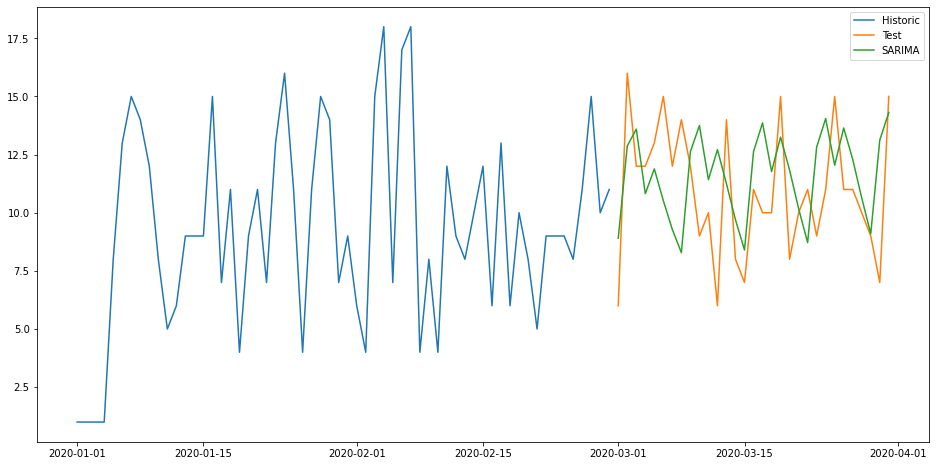

In [14]:
#the Sarina Model is another seasonal model. I don't know how it works exactly.  I need to review the math and the
#documentation.  I am getting a convergence error.  Will fix immediatly

y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(historic.sales, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.forecast(len(test.sales), dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( historic['sales'], label='Historic')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()
    
rmse = sqrt(mean_squared_error(test.sales, y_hat_avg.SARIMA))
rmseDictionary["SARIMA"] = rmse

mape = mape_vectorized_v2(test.sales, y_hat_avg['SARIMA'])
mapeDictionary['SARIMA'] = mape 

#print("The RMSE for the SARIMA Model is equal to {}\n".format(rmse))
   

In [15]:
print(rmseDictionary)

mn = min(rmseDictionary.items(), key=operator.itemgetter(1))[0]
print("The Best Model is {}".format(mn))

{'Naive': 4.650416500311948, 'Simple Average': 3.864665029828413, 'Moving Average': 2.850786580399194, 'Exponential_Smoothing.3': 3.864665058622391, 'Exponential_Smoothing.2': 3.8907287216857633, 'Exponential_Smoothing.5': 4.038706174884183, 'Exponential_Smoothing_Optimum': 3.864665058622391, 'Holt_Winter_Optimum': 3.7255251931824076, 'Holt_Winter_.5': 4.193341923450785, 'Holt_Winter_.3': 4.007981277418963, 'SARIMA': 3.055636192247495}
The Best Model is Moving Average


In [16]:
print (mapeDictionary)

mn = min(mapeDictionary.items(), key=operator.itemgetter(1))[0]
print("The Best Model is {}".format(mn))

{'Naive': 0.4248514297237633, 'Simple_Average': 0.7014871459995663, 'Moving Average': 0.2589423226705062, 'Simple_Exponential_Smoothing.3': 0.7014871310910847, 'Simple_Exponential_Smoothing.2': 0.4765668392710252, 'Simple_Exponential_Smoothing.5': 0.39056704728123787, 'Simple_Exponential_Smoothing_Optimum': 0.7014871310910847, 'Holt_Winter_Optimum': 0.7394861676289067, 'Holt_Winter_.5': 0.840375675006429, 'Holt_Winter_.3': 0.8120170834920649, 'SARIMA': 0.2633369772552491}
The Best Model is Moving Average
